<a href="https://colab.research.google.com/github/suhayb-h/Acute-Lymphoblastic-Leukemia-Classifier/blob/main/2_Logistic_Regression_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Acute Lymphoblastic Leukemia Classifier:
## Notebook 2: Logistic Regression and Convolutional Neural Network Models
##### Project Author: Suhayb Hafiz 

---

Author is currently working on code commentary and additional markdown writing for this notebook


## Introduction

This notebook established a base model that would serve as a comparison baseline for other models. The initial intention was to construct a classic machine learning model, but such models required computational resources that were not available. Dealing with images through data generators proved to be computationally efficient and manageable, but data generators could only be used for tensorflow, pytorch or similar neural network libraries. 

The most appropriate base model to assess the data distribution was a simple logistic regression model. Since traditional classic modelling libraries would fail to compute the image data, a logistic regression model was built through tensorflow using a sequential neural network. Afterwards, more layers were added the logistic regression model to create a new simple sequential neural network.

The initial steps were to import relevant libraries, import the dataset and scale the data. As mentioned in the EDA notebook, the validation data set was utilized as the test set. For this reason, a new validation set was created by splitting the training set directly from the data generator. 17.5% of the training set was chosen to be used as the validation dataset simply because it roughly equates to the size of the original validation data set. 

Within the image data generators, all images were rescaled, randomly rotated, randomly flipped, and shuffled. These manipulations were established to implement as much randomness into the data as possible, while simultaneously maintaining the integrity of the images.  Since these images were round cells without obvious directional polarity, rotatating and flipping the cells should not affect the integrity of the sequential model. These manipulations also have an added benefit of increasing the percieved number of samples by the models. Finally, based on the analysis of colour distribution in the previous EDA report, images were forced to retain their colors before training the model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

# Preparing the Data

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range = 180, 
                                   horizontal_flip = True, 
                                   vertical_flip = True, 
                                   validation_split = 0.175)

# Specified where images should be loaded from and additional attributes:
train_generator = \
train_datagen.flow_from_directory(
    '/content/drive/Othercomputers/My MacBook Air/C-NMC_Leukemia/training_data', 
    color_mode = 'rgb', 
    class_mode = 'categorical',
    shuffle = True, 
    subset = 'training')

validation_generator = \
train_datagen.flow_from_directory(
    '/content/drive/Othercomputers/My MacBook Air/C-NMC_Leukemia/training_data', 
    color_mode = 'rgb', 
    class_mode = 'categorical',
    shuffle = True, 
    subset = 'validation')

Found 8796 images belonging to 2 classes.
Found 1865 images belonging to 2 classes.


As mentioned in the EDA notebook, the dataset for this project had a class imbalance, which could negatively impact the performance of the model. In order to combat this issue, a higher weight was assigned to "hem" cells as mentioned in the EDA report. These weights were then passed to the model during training.

In [ ]:
# Weight calculation for normal lymphocytes:  
# Number of cancer cells divided by the number of normal cells.

7272/3389

2.145765712599587

In [ ]:
# Specify how the machine names classes:

class_names = validation_generator.class_indices
class_names

{'all': 0, 'hem': 1}

In [ ]:
# Weight of 2.15 is applied to 'hem' cells

weights = {0: 1,
           1: 2.15}

# Logistic Regression Model

A simple logistic regression model is a binary classification model. It assigns labels to one of two classes based on a where a data point lies along a sigmoid curve. Neural networks are constructed in layers, in which each layer performs a newfound mathematical function. Each added new layer adds complexity to the model that can translate into better learning. In order to replicate a logistic regression model, a neural network needed to be constructed that had as little learning functionality as possible, implying that the model needed to be simple in it's construction. For this reason a model that comprised of only two layers was isntantiated. The first layer being the input layer, and the last layer being the output layer. Furthermore, the output layer was set to a sigmoidal activation parameter, thereby replicating the sigmoidal classification of a traditional logistic regression model. The model was constructed below:

In [ ]:
base_model = Sequential()

base_model.add(InputLayer(input_shape=(256, 256, 3)))
base_model.add(Flatten())

# Simulate a classic 'Logistic Regression' model by constructing a neural network:
# No layers were added between the input and output layers

base_model.add(Dense(2, activation='sigmoid'))

base_model.compile('SGD', # --> 
              loss=tf.losses.BinaryCrossentropy(), # -->
              metrics = ['categorical_accuracy']) # -->
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 2)                 393218    
                                                                 
Total params: 393,218
Trainable params: 393,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor = 'val_categorical_accuracy', 
                           patience = 10,  
                           verbose = 1)

model_0 = base_model.fit(train_generator, 
                        epochs=25,
                        validation_data = validation_generator, 
                        shuffle=True, 
                        class_weight = weights,
                        callbacks = [early_stop])

Epoch 1/25
275/275 [==============================] - 2370s 9s/step - loss: 2.6459 - categorical_accuracy: 0.6892 - val_loss: 1.8556 - val_categorical_accuracy: 0.6434
Epoch 2/25
275/275 [==============================] - 149s 541ms/step - loss: 2.4932 - categorical_accuracy: 0.6988 - val_loss: 6.6564 - val_categorical_accuracy: 0.3180
Epoch 3/25
275/275 [==============================] - 149s 541ms/step - loss: 2.8723 - categorical_accuracy: 0.6867 - val_loss: 1.1833 - val_categorical_accuracy: 0.7603
Epoch 4/25
275/275 [==============================] - 149s 542ms/step - loss: 2.4197 - categorical_accuracy: 0.6950 - val_loss: 2.9479 - val_categorical_accuracy: 0.6971
Epoch 5/25
275/275 [==============================] - 149s 543ms/step - loss: 2.4965 - categorical_accuracy: 0.6984 - val_loss: 1.9438 - val_categorical_accuracy: 0.7426
Epoch 6/25
275/275 [==============================] - 149s 542ms/step - loss: 2.4589 - categorical_accuracy: 0.6988 - val_loss: 1.2033 - val_categorical

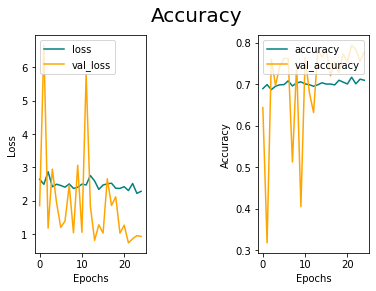

In [ ]:
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.plot(model_0.history['loss'], 
         color = 'teal', 
         label = 'loss')
plt.plot(model_0.history['val_loss'], 
         color = 'orange', 
         label = 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc = "upper left")
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(model_0.history['categorical_accuracy'], 
         color = 'teal', 
         label = 'accuracy')
plt.plot(model_0.history['val_categorical_accuracy'], 
         color = 'orange', 
         label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplots_adjust(wspace=1) 
plt.show()

As previously stated in the EDA notebook, the CSV file that was provided with the original data needed to have its' labels swapped, and this task was completed in the coding cell below. This new column served as the target by which the test data will be assessed on. 

In [ ]:
df_test = \
pd.read_csv(
    '/content/drive/Othercomputers/My MacBook Air/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv', 
    dtype = str)

# a new column called labels_ was created wherein 'all' patients are labelled 0 
df_test.loc[df_test['Patient_ID'].str.contains('all'), 'true_labels'] = '0'

# labels_ was also given a label 1 for any patients that were non-cancerous
df_test.loc[df_test['Patient_ID'].str.contains('hem'), 'true_labels'] = '1'

df_test

,Patient_ID,new_names,labels,true_labels
0,UID_57_29_1_all.bmp,1.bmp,1,0
1,UID_57_22_2_all.bmp,2.bmp,1,0
2,UID_57_31_3_all.bmp,3.bmp,1,0
3,UID_H49_35_1_hem.bmp,4.bmp,0,1
4,UID_58_6_13_all.bmp,5.bmp,1,0
...,...,...,...,...
1862,UID_54_33_1_all.bmp,1863.bmp,1,0
1863,UID_55_24_1_all.bmp,1864.bmp,1,0
1864,UID_H32_20_1_hem.bmp,1865.bmp,0,1
1865,UID_54_30_2_all.bmp,1866.bmp,1,0


In [ ]:
# Apply the same rescaling factor as our other generators
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = \
test_datagen.flow_from_dataframe(
    dataframe = df_test,
    directory = \
    '/content/drive/Othercomputers/My MacBook Air/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data',
    batch_size = 100,
    x_col = 'new_names',
    y_col = 'true_labels',
    color_mode = 'rgb',
    class_mode = 'categorical')

X_test, y_test = test_generator.next()

Found 1867 validated image filenames belonging to 2 classes.


In [ ]:
score_0 = base_model.evaluate(X_test, y_test)

print('Test loss:', score_0[0])
print('Test accuracy:', score_0[1])

4/4 [==============================] - 0s 8ms/step - loss: 1.4140 - categorical_accuracy: 0.6900
Test loss: 1.4139928817749023
Test accuracy: 0.6899999976158142


In [ ]:
# Calculate the predictions
predict_probas_0 = base_model.predict(X_test)

# Convert probabilities to label encoding
y_predict_0 = np.argmax(predict_probas_0, axis=1)

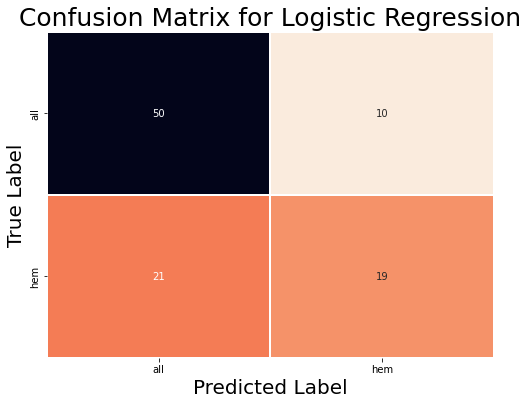

In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
conf_mat_0 = confusion_matrix(y_test_labels, y_predict_0)

plt.figure(figsize = (8,6))
sns.heatmap(conf_mat_0,
            annot=True,
            cbar=False,
            xticklabels = class_names,
            yticklabels = class_names,
            cmap = "rocket_r",
            linewidths = 1)
plt.title('Confusion Matrix for Logistic Regression', 
          size = 25, 
          y = 1)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()

Sequential models are constructed by adding layers and adjusting the parameters of each individual layer. The model constructed in this notebook was created with three 2-dimnsional convlution layers, followed by a flattened layer and 2 dense layers. The convolutional layers recieved the most adjustment in terms of parameter optimization. Regularizers were established on these layers with the sole purpose of reducing overfitting. Two regularizers were available, L1 and L2, with the option to utilize both regularizers in conjuntion for each parameter. Ultimately, L2 was chosen as the sole regularizer since it specifically serves the function of reducing overfitting. Each convolutional layer was also given a dropout function, since doing so also reduces overfitting. All three layers were also given maximum pooling layers. The final output layer of this model was set to a sigmoid activating dense layer with two outputs. This output layer serves to provide a binary classification between two final results, those being cancerous and non-cancerous.

# Neural Network Model

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation = 'relu', 
                 #input_shape = (480, 480, 3)
                 ))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())

#model.add(Dense(256, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

model.compile('SGD', 
              loss = tf.losses.CategoricalCrossentropy(), 
              metrics = ['categorical_accuracy'])
#model.summary()

In [ ]:
model_1 = model.fit(train_generator, 
                 epochs = 50, 
                 validation_data = validation_generator, 
                 class_weight = weights,
                 callbacks = [early_stop])

Epoch 1/50
275/275 [==============================] - 152s 547ms/step - loss: 0.7287 - categorical_accuracy: 0.7713 - val_loss: 0.5434 - val_categorical_accuracy: 0.7458
Epoch 2/50
275/275 [==============================] - 150s 545ms/step - loss: 0.6850 - categorical_accuracy: 0.7843 - val_loss: 0.5299 - val_categorical_accuracy: 0.7458
Epoch 3/50
275/275 [==============================] - 151s 548ms/step - loss: 0.6729 - categorical_accuracy: 0.7893 - val_loss: 0.5230 - val_categorical_accuracy: 0.7383
Epoch 4/50
275/275 [==============================] - 151s 551ms/step - loss: 0.6710 - categorical_accuracy: 0.7917 - val_loss: 0.5370 - val_categorical_accuracy: 0.7475
Epoch 5/50
275/275 [==============================] - 151s 548ms/step - loss: 0.6696 - categorical_accuracy: 0.7917 - val_loss: 0.5588 - val_categorical_accuracy: 0.7458
Epoch 6/50
275/275 [==============================] - 152s 554ms/step - loss: 0.6682 - categorical_accuracy: 0.7897 - val_loss: 0.5408 - val_categoric

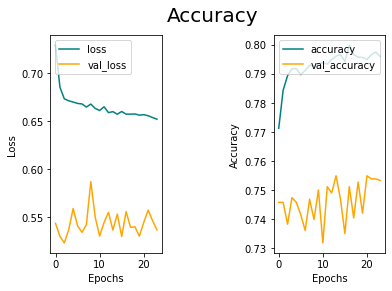

In [ ]:
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.plot(model_1.history['loss'], 
         color = 'teal', 
         label = 'loss')
plt.plot(model_1.history['val_loss'], 
         color = 'orange', 
         label = 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc = "upper left")
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(model_1.history['categorical_accuracy'], 
         color = 'teal', 
         label = 'accuracy')
plt.plot(model_1.history['val_categorical_accuracy'], 
         color = 'orange', 
         label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc = "upper left")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplots_adjust(wspace=1) 
plt.show()

The final phase of analysis was to assess the models performance on the testing data. Just as for the training and validation data, the testing data was imported via an image generator. However, in the original dataset, the validation data was was labelled differently than the training set. This issue was discussed further in the EDA notebook. For this reason, a different methodology was used to import the data. The validation images were imported and labelled in accordance to the CSV file (and subsequent extracted dataframe) that was provided with the original data. The same parameter optimizations that were utilized for the training and validation generators were utilized for the test generator as well. 

In [ ]:
# Evaluate the model's performance on the test data
score_1 = model.evaluate(X_test, y_test)

print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

4/4 [==============================] - 0s 19ms/step - loss: 0.6412 - categorical_accuracy: 0.6700
Test loss: 0.6411870718002319
Test accuracy: 0.6700000166893005


In [ ]:
# Calculate the predictions
predict_probas_1 = model.predict(X_test)

# Convert probabilities to label encoding
y_predict_1 = np.argmax(predict_probas_1, axis=1)

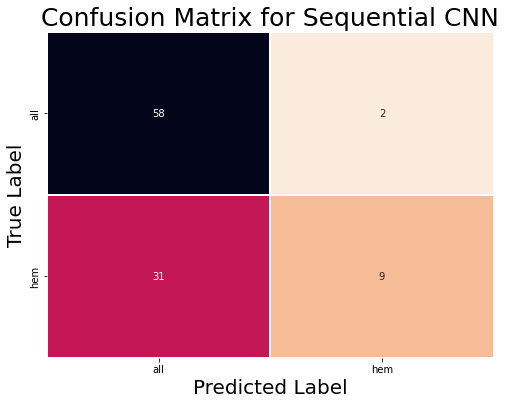

In [ ]:
conf_mat_1 = confusion_matrix(y_test_labels, y_predict_1)

plt.figure(figsize = (8,6))
sns.heatmap(conf_mat_1,
            annot=True,
            cbar=False,
            xticklabels = class_names,
            yticklabels = class_names,
            cmap = "rocket_r",
            linewidths = 1)
plt.title('Confusion Matrix for Sequential CNN', 
          size = 25, 
          y = 1.01)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()